# HIV Model
By Jamie Santiago

In [20]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import *
from matplotlib import *

In [21]:
# Initial number of Lymphocytes, Latently Infected Cells, Actively Infected Cells and Virions
init = State(tCells = 200, latentInfected = 1, activeInfected = 1, virions = 10) 
# Values of constant variables which determine the course of the system, such as data involving the behavior of the Cells tracked
system = System(init = init, t_0 = 0, t_end = 120, dt = .01, rBirthRate = 1.36,
                proportionCell = .2, deathRate = .00136, infectionRate = .00027,
                proportionLatent = .1, activeRate = .036, eDeathRate = .33, 
                vBirthRate = 100, vRemoveRate = 2)

,values
init,tCells 200 latentInfected 1 ac...
t_0,0
t_end,120
dt,0.01
rBirthRate,1.36
proportionCell,0.2
deathRate,0.00136
infectionRate,0.00027
proportionLatent,0.1
activeRate,0.036


In [22]:
# Calculates the change in the number of cells in one step
def update_func(frame, system): 
    unpack(system) #allows us to access all the variables directly
    tCells, latentInfected, activeInfected, virions = frame #allows us to access all the latest numbers of cells for each type
    
    #calculates change in lymphocytes
    dRdt = ((rBirthRate*proportionCell) - (deathRate*tCells) - (infectionRate*tCells*virions)) 
    #calculates the change in Latently Infected Cells
    dLdt = ((proportionLatent*infectionRate*tCells*virions) - (deathRate*latentInfected) - (activeRate*latentInfected))
    #calculates the change in Actively Infected Cells
    dEdt = (((1-proportionLatent)*(infectionRate*tCells*virions)) + (activeRate*latentInfected) - (eDeathRate*activeInfected))
    #calculates the change in Virions
    dVdt = ((vBirthRate*activeInfected) - (vRemoveRate*virions))
    
    #incorporates the changes of this step to the latest numbers to find the number of cells for each type at the end of the step
    tCells += dRdt*dt
    latentInfected += dLdt*dt
    activeInfected += dEdt*dt
    virions += dVdt*dt
    
    #Outputs the number of cells for each type
    return State(tCells = tCells, latentInfected = latentInfected, activeInfected = activeInfected, virions = virions)


In [23]:
def run_simulation(system, update_func): #maintains and records the steps in the simulation
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system) #allows direct access to all the variables
    
    frame = TimeFrame(columns=init.index) #establishes the number of cells per cell type as a Time Frame
    frame.row[t_0] = init #puts the initial cell numbers into the Time Frame
    
    for t in linrange(t_0, t_end, dt): #counts how many steps we need to run through and how many we have ran through
        frame.row[t+dt] = update_func(frame.row[t], system) #records the results from each step
    
    #returns the final Time Frame, which contains the number of cells for each step through
    return frame

In [30]:
def plot_results(frame, includeVirion): #plots the data from the outputted Time Frame
    unpack(frame) #allows direct access to all the cell numbers
    
    if(includeVirion): #seperates the cell types so they plot better
        plot(tCells, '--', label='T Cells') #plots Lymphocytes
        plot(latentInfected, '-b', label='Latent Infected') #plots Latently Infected Cells
        plot(activeInfected, '-g', label='Actively Infected') #plots Actively Infected Cells
        plot(virions, ':r', label='Virions') #plots Virions
    else:
        plt.figure(1)
        plot(virions, ':r', label='Virions') #plots Virions
        plt.figure(2)
        plot(tCells, '--', label='T Cells') #plots Lymphocytes
        plot(latentInfected, '-b', label='Latent Infected') #plots Latently Infected Cells
        plot(activeInfected, '-g', label='Actively Infected') #plots Actively Infected Cells
    
    decorate(xlabel='Time (days)', # makes the x axis look nice
             ylabel='Number of Cells') #Makes the y axis look nice

In [31]:
data = run_simulation(system, update_func) #actually runs through the simulation

,tCells,latentInfected,activeInfected,virions
0.00,200,1,1,10
0.01,199.995,1.00017,1.00192,10.8
0.02,199.989,1.00038,1.00422,11.5859
0.03,199.983,1.00063,1.0069,12.3584
0.04,199.976,1.00092,1.00994,13.1182
0.05,199.969,1.00126,1.01334,13.8657
0.06,199.961,1.00163,1.0171,14.6018
0.07,199.953,1.00204,1.0212,15.3268
0.08,199.945,1.0025,1.02564,16.0415
0.09,199.936,1.00299,1.03041,16.7463


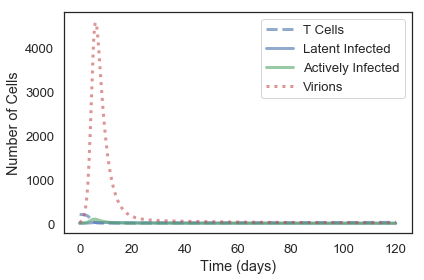

In [32]:
plot_results(data, True) #plots Lympocytes, Latently Infected, Actively Infected and Virions

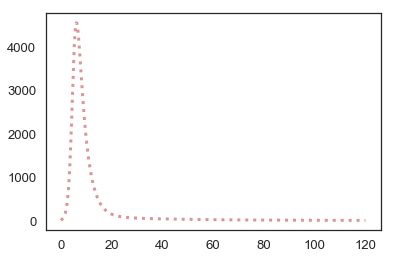

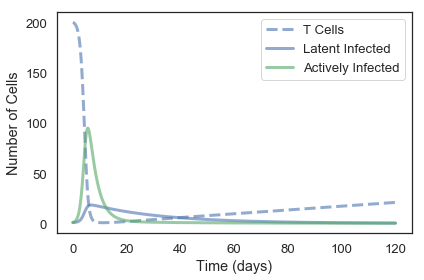

In [33]:
plot_results(data, False) #plots Lympocytes, Latently Infected, Actively Infected together and Virions separately